<a href="https://colab.research.google.com/github/mtgr18977/python_notebooks/blob/main/prediction_b3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Trabalho USP-MBL/ESALQ
-----
Paulo Guilherme Pilotti Duarte
-----
Cotação, variação, diferenciação e previsão do valor de ações da Petrobrás
-----
-----


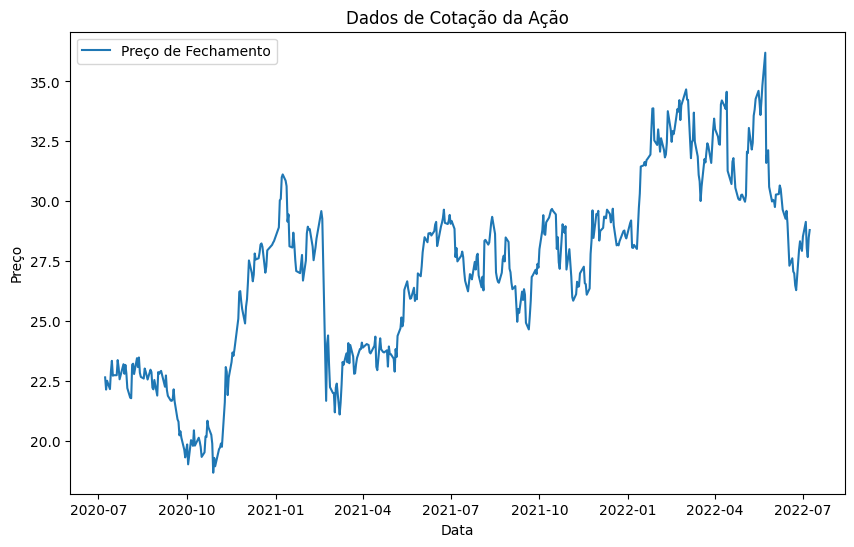

------


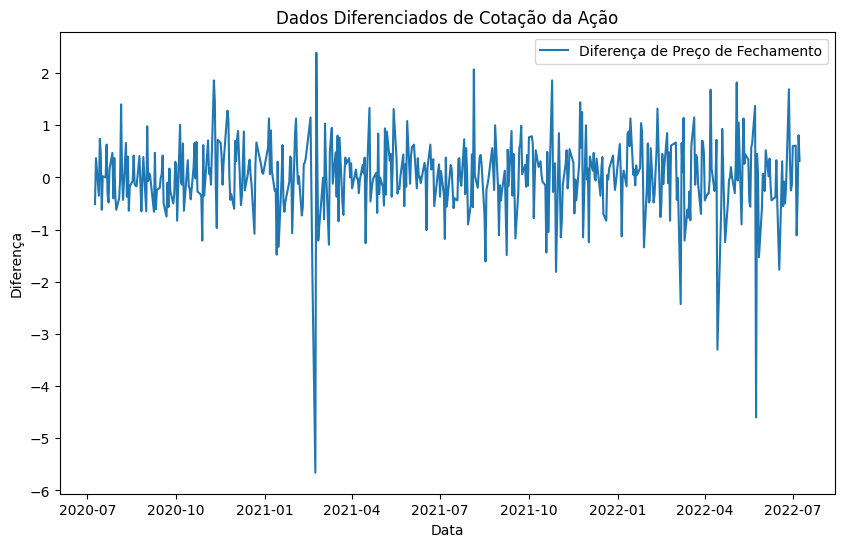

------


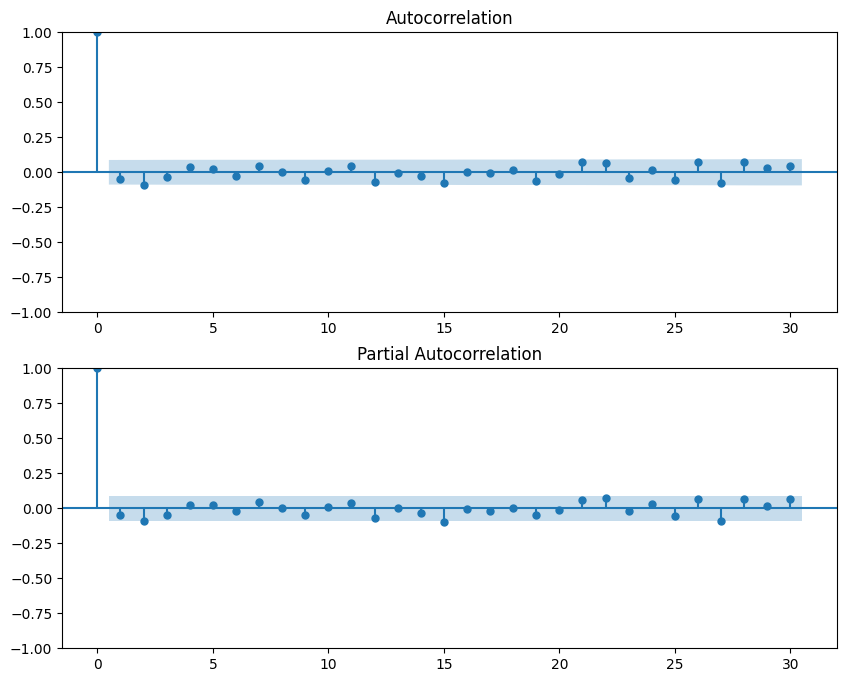

------
Ordem de Diferenciação (d): 0
Ordem do Termo Autorregressivo (p): 2
Ordem do Termo de Média Móvel (q): 2
------


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  496
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -543.551
Date:                Wed, 30 Aug 2023   AIC                           1095.102
Time:                        12:35:16   BIC                           1111.928
Sample:                             0   HQIC                          1101.707
                                - 496                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0123      0.031      0.401      0.689      -0.048       0.072
ar.L1          0.5174      0.344      1.503      0.133      -0.157       1.192
ma.L1         -0.5956      0.335     -1.777      0.0

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm

# Carregar os dados
data = pd.read_csv('/content/PETR4_D1.csv')
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
data_diff = data['Close'].diff().dropna()

print("Trabalho USP-MBL/ESALQ")
print("-----")
print("Paulo Guilherme Pilotti Duarte")
print("-----")
print("Cotação, variação, diferenciação e previsão do valor de ações da Petrobrás")
print("-----")
print("-----")

# Visualizar os dados
plt.figure(figsize=(10, 6))
plt.plot(data['Close'], label='Preço de Fechamento')
plt.title('Dados de Cotação da Ação')
plt.xlabel('Data')
plt.ylabel('Preço')
plt.legend()
plt.show()

print("------")

# Diferenciação para tornar os dados estacionários
data_diff = data['Close'].diff().dropna()

plt.figure(figsize=(10, 6))
plt.plot(data_diff, label='Diferença de Preço de Fechamento')
plt.title('Dados Diferenciados de Cotação da Ação')
plt.xlabel('Data')
plt.ylabel('Diferença')
plt.legend()
plt.show()

print("------")

# Função para verificar a estacionariedade
def check_stationarity(timeseries):
    result = adfuller(timeseries)
    p_value = result[1]
    return p_value <= 0.05

# Encontrar a ordem de diferenciação d
d = 0
while not check_stationarity(data_diff):
    d += 1
    data_diff = data_diff.diff().dropna()

# Plot ACF e PACF após a diferenciação
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
plot_acf(data_diff, ax=ax1, lags=30)
plot_pacf(data_diff, ax=ax2, lags=30)
plt.show()

print("------")

# Sugestão para p e q baseado nos gráficos
p = 2  # Observado a partir do gráfico PACF
q = 2  # Observado a partir do gráfico ACF

print(f"Ordem de Diferenciação (d): {d}")
print(f"Ordem do Termo Autorregressivo (p): {p}")
print(f"Ordem do Termo de Média Móvel (q): {q}")

print("------")

# Crie o modelo ARIMA
model = sm.tsa.ARIMA(data_diff, order=(1, 0, 1))  # Substitua p, d, q pelos valores adequados
result = model.fit()

# Resumo do modelo
print(result.summary())